Image shape: (288, 139, 130)


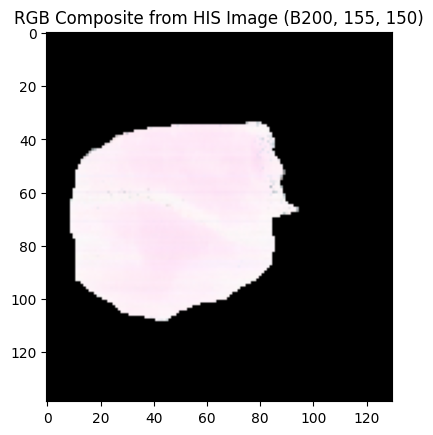

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = 'D:\RS_Class_2024\RS_Class_2025\HIS_example\Anti-1-2.tif'

with rasterio.open(image_path) as dataset:
    # Read the image data
    hyperspectral_data = dataset.read()

print(f"Image shape: {hyperspectral_data.shape}") #Print the shape of the image data

red_band = hyperspectral_data[199, :, :]
green_band = hyperspectral_data[154, :, :]
blue_band = hyperspectral_data[149, :, :]

rgb_composite = np.dstack((red_band, green_band, blue_band))

rgb_composite_normalized = rgb_composite / np.max(rgb_composite)

plt.imshow(rgb_composite_normalized)
plt.title('RGB Composite from HIS Image (B200, 155, 150)')
plt.show()

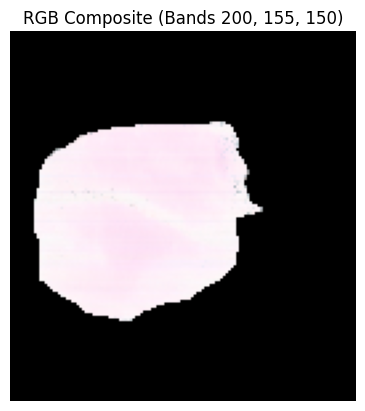

In [3]:
import tkinter as tk
from tkinter import filedialog
import threading
from tkinter import ttk
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def browse_file():
    global image_path
    imamge_path = filedialog.askopenfilename(title="Select a Hyperspectral Image")
    progress['value']=0
    progress_label.config(text ="File Selected")

def plot_rgb():
    def task():
        r_band = int(r_entry.get())
        g_band = int(g_entry.get())
        b_band = int(b_entry.get())

        with rasterio.open(image_path) as dataset:
            data = dataset.read()

        red = data[r_band-1, :, :]
        green = data[g_band-1, :, :]
        blue = data[b_band-1, :, :]

        rgb = np.dstack((red, green, blue))
        rgb_norm = rgb/ np.max(rgb)

        plt.imshow(rgb_norm)
        plt.title(f'RGB Composite (Bands {r_band}, {g_band}, {b_band})')
        plt.axis('off')
        plt.show()

        progress['value'] = 100
        progress_label.config(text="Display Complete!!")

    threading.Thread(target=task).start()

root = tk.Tk()
root.title("Hyperspectral RGB Viewer")
root.geometry("500x350")

browse_button = tk.Button(root, text = "Browse Hyperspectral Image", command = browse_file)
browse_button.pack(pady=10)

r_entry = tk.Entry(root)
r_entry.pack(pady=5)
r_entry.insert(0, "200")

g_entry = tk.Entry(root)
g_entry.pack(pady=5)
g_entry.insert(0, "155")

b_entry = tk.Entry(root)
b_entry.pack(pady=5)
b_entry.insert(0,"150")

plot_button = tk.Button(root, text="Plot RGB Composite", command = plot_rgb)
plot_button.pack(pady=10)

progress = ttk.Progressbar(root, orient="horizontal", length =400, mode= "determinate")
progress.pack(pady=10)

progress_label = tk.Label(root, text="Progress")
progress_label.pack()

root.mainloop()

C:\Users\user\AppData\Local\Temp\ipykernel_80268\1093931870.py:18: RuntimeWarning: invalid value encountered in divide
  Math = (Band217 -Band213) / (Band217 + Band213)


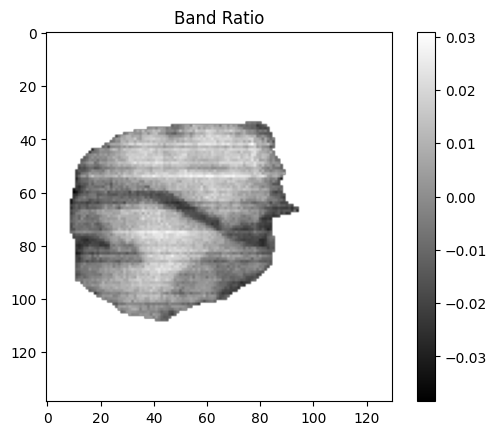

In [7]:
#Ex4 : Basic Operation with Hyperspectral


import rasterio
import numpy as np
import matplotlib.pyplot as plt


image_path = 'D:\RS_Class_2024\RS_Class_2025\HIS_example\Anti-1-2.tif'

with rasterio.open(image_path) as dataset:
    #Read the image data
    hyperspectral_data = dataset.read()

Band217 = hyperspectral_data[216,:,:]
Band213 = hyperspectral_data[212,:,:]

Math = (Band217 -Band213) / (Band217 + Band213)

plt.imshow(Math, cmap ='grey')
plt.colorbar()
plt.title('Band Ratio')
plt.show()